# INFO 371 Lab 8: Convolutions

#### Instructions

Please submit your completed lab notebook by the deadline. Working together is fun and useful but you must submit your own work. Discussing the solutions and problems with your instructors and classmates is completely fine. However, **do not** copy and paste their solution(s). Remember - your code/work should not appear (directly or indirectly) on any one else's machine and vice versa. 


#### Introduction
For this lab, you will be implementing a convolutional filter. We'll work with a single image to perform this task.

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### Part 1: Data preparation

To start, let's prepare the data. This will have several steps.

#### 1. Load the data.

To begin, load the image in the "snoqualmie-tressle.jpg" file. What does the image look like?

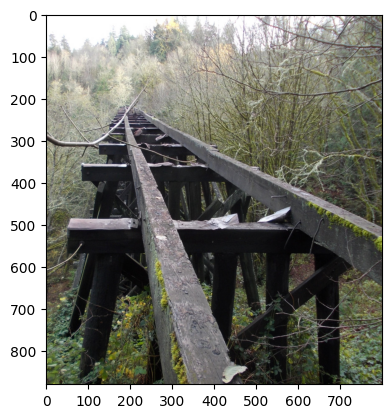

In [10]:
img = mpimg.imread('snoqualmie-trestle.jpg')
_ = plt.imshow(img)

It looks like I am looking at a wooden bridge situated in a forest that is quite old.

#### 2. Display only G channel

Next display only the green (G) channel of the image as a greyscale image (you may need to change your colormap for this). Note how the image contains several horizontal edges. We'll create a convolutional filter to detect these horizontal edges. Store the data in the G channel as a variable.

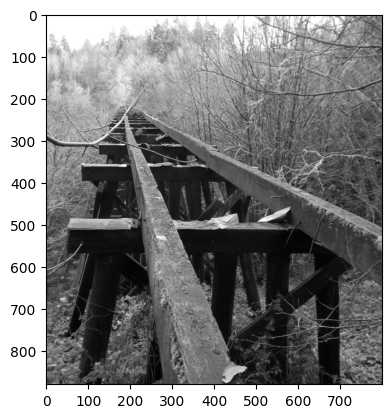

In [ ]:
green_channel = img[:, :, 1]

# Display the green channel
plt.imshow(green_channel, cmap='grey')
plt.show() 

### Part 2: Set Up Filter

Next, let's set up our convolutional filter. 

#### 1. Create filter

Create a numpy array that is two-dimensional. For the first row, set the values = 1 and for the second row, set the values = -1. Use something that is at least 2x2 but no larger than 2x5. Show your filter.

In [23]:
import numpy as np

In [27]:
img_filter = np.array([[1, 1], [-1, -1]])
img_filter

array([[ 1,  1],
       [-1, -1]])

#### 2. Create output

Our filter will pass over our image to detect the horizontal wood rails. We will first need an output for our convolutions. Create an empty numpy array (call this `conv_output`) that is just slightly smaller than the size of the original image (based on the G channel data). The difference in size in each dimension should be equivalent to the dimension of the original image minus one less than the shape of your filter along that same dimension. For example, if our image is 880x800 and we used a 2x5 filter, we would have a 879x796 output (879 = 880 - (2 - 1) and 796 = 800 - (5 - 1)). Show the shape of your `conv_output`.

In [ ]:
green_channel.shape, img_filter.shape # use an ouput array of shape (879, 799)

((880, 800), (2, 2))

In [ ]:
conv_output = np.empty((879, 799))
conv_output.shape

(879, 799)

### Part 3: Convolution

Next, we will perform the convolutions.

#### 1. Run convolutions

You are provided with a nested for loop below. For the convolution, iterate across each row and column in your `conv_output` - replace the `num_rows` and `num_cols` variables below with the appropriate values. Then for each `row_ind` and `col_ind`, perform the convolution by doing the following:
- select the data from the green channel that is the same size as your mask, starting at `row_ind` and `col_ind` and ending at `row_ind` + height of mask and `col_ind` + width of mask
- multiply the data you selected from the green channel by your mask 
- sum the result
- store the result in `conv_output` at `row_ind`, `col_ind`

In [ ]:
for row_ind in range(879):
    for col_ind in range(799):
        data_selection = green_channel[row_ind:row_ind+2, col_ind:col_ind+2] # Get a 2x2 array from the original image
        conv_output[row_ind, col_ind] = np.sum(data_selection * img_filter) # Multiply the 2x2 array by the filter and sum

#### 2. Show your convolved image
Show your `conv_output` as an image (again, it may help to change your colormap). How are the horizontal edges highlighted in your image? How are the upper edges of the horizontal rails shown? How are the lower edges of the horizontal rails shown? How does this relate to the mask you created? 

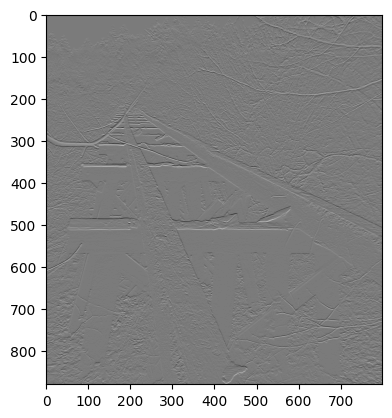

In [ ]:
_ = plt.imshow(conv_output, cmap='grey')

The horizontal edges of the rail are highlighted by black and white lines that look impressed into the grey background. The upper edges of the rail are black, while the bottom edges of the rail are white. This makes sense in terms of my mask since we set the first row to 1s, or positive values, and the second row to -1s, or negative values.